<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Navarro Silva José Tonatiuh, Muñoz Pablo Humberto, Rodríguez Rodríguez Ana Esmeralda.

**Fecha:** 05 de Julio del 2021

**Expediente** : 722399, 719963 , 709288
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/if722399/Proyecto-SPF

# Proyecto TEMA-2

### 1.1 Título
## Niveles de CO2 emitidos por autos vendidos

### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - Pronosticar el promedio de los niveles de CO2 en relación con los autos vendidos

> #### 1.2 Objetivos específicos.  
>  - Proyectar el volúmen de ventas dependiendo el tipo de carro.
>  - Simular el comportamiento de las ventas totales.
>  - Estimar el cambio en la cantidad de CO2 a partir de los autos vendidos. 
>  - Analizar de forma gráfica las emisiones de C02 y los autos vendidos.

### 1.3 Definición del problema.
 
Vivimos en una ciudad donde la infraestructura está diseñada para el uso del carro. México es un país que se ha desarrollado en la industria del ensamblaje y producción de automoviles, siendo Estados Unidos uno de nuestros aliados comerciales más importantes, sin embargo existe la oportunidad de encontrar marcas de autos internacionales. Buscamos simular el impacto que tienen las ventas de autos, ya sean eléctricos, híbridos y de diesel en las emisiones de CO2.


Nuestro propósito con este proyecto es analizar la base de datos, obtener las distribuciones de probabilidad de cada variable de interés y asi poder realizar una conclusión acerca de la relación que existe entre las ventas de los 3 tipos de autos y la emisión de CO2.

Se utilizarán las siguientes variables: Promedio de $CO_2$, ventas de vehículos que usan diesel, ventas de vehículos que utilizan gasolina, ventas de vehículos que son híbridos, ventas de vehículos que son eléctricos.




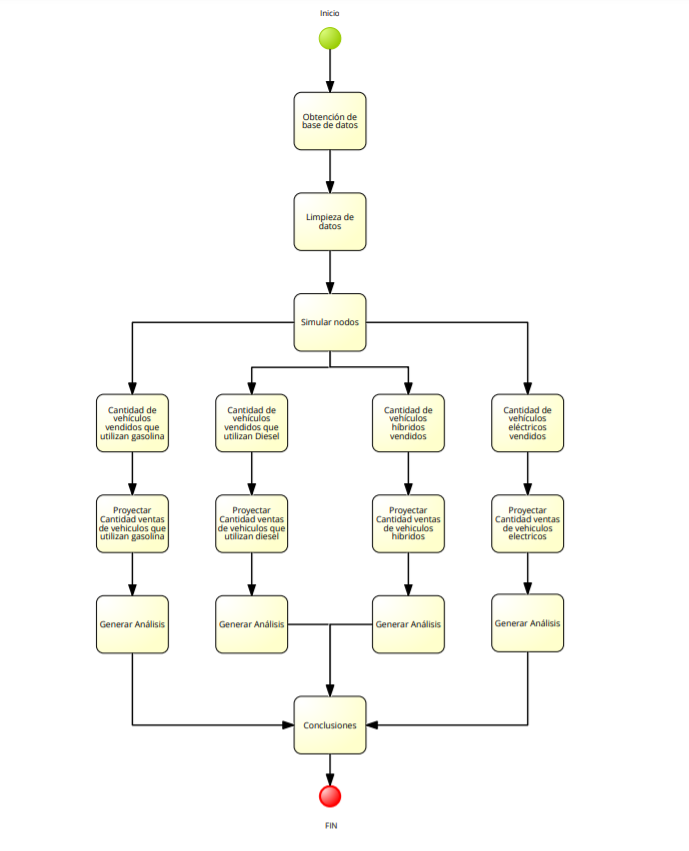

### 1.4 Nodos y variables que se decidieron simular y porqué

Los nodos que se han elegido para este proyecto es: 

>- Total de ventas de autos que usan gasolina
>- Total de ventas de autos que usan diesel.
>- Total de ventas de autos eléctricos.
>- Total de ventas de autos híbridos.

Se simula el volumen de ventas por auto para analizar como afecta el promedio de emisiones .

Al simular la Ventas de autos que usan Diesel podremos analizar los patrones en su venta.

El total de ventas de autos eléctricos nos dejará conocer la relacción en los aumentos de ventas de esta variable y la disminución de ventas de otro tipo de auto.

El total de ventas de autos híbridos permitirá determinar si las emisiones de gas tienen un incremento en la venta de este auto.

Al finalizar la simulación se podrán elegir los autos que presentan una mayor posibilidad de ventas para un inversionista.

### 1.5 Definición de hipótesis y supuestos.


Hipótesis:

- El volúmen de las emisiones de CO2 está altamente correlacionado con las ventas del tipo de auto.
- El vehículo que utilza diesel es el que se vende en mayor cantidad.
- El volúmen de las emisiones de CO2 va incrementando a lo largo del tiempo.


Supuestos: 

- La producción de CO2 g/km por tipo de carro es de
    1. coche mediano promedio que utiliza gasolina: 143 g/km
    2. coche mediano promedio que utiliza diesel: 114 g/km
    3. coche mediano promedio hibrido: 101 g/km
    4. coche mediano promedio eléctrico: 68 g/km
    
    
- Los datos obtenidos son verídicos.
- El total de números de carros que utilizan gasolina se presenta como la diferencia entre total de ventas y las ventas de los 3 tipos de carros.
- Las unidades en las que se presenta la cantidad de CO2 es de g/km (gramos por kilómetro).

### 1.6 Obtención de bases de datos

La base de datos se obtuvo del siguiente enlace: https://www.kaggle.com/dmi3kno/newcarsalesnorway?select=norway_new_car_sales_by_month.csv, la cual se encuentra en el sitio de Kaggle, sitio web diseñado para proporcionar una gran catidad de data sets con propósitos académicos.

### Librerias a utilzar a lo largo del proyecto

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from fitter import Fitter as ft
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import scipy.stats as st  
import statsmodels.api as sm 
from scipy import optimize
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
data = pd.read_csv('norway_new_car_sales_by_month.csv')
data.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007-1,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007-2,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007-3,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007-4,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007-5,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


### Limpieza de base de datos

In [3]:
data = data.iloc[:,[0,2,11,14,15]]

data.set_index('Year', inplace=True)
data.fillna(0, inplace = True)
data['Quantity_Bensin'] = data['Quantity']- data['Quantity_Diesel'] - data['Quantity_Hybrid'] - data['Quantity_Electric']

# Supuestos sobre CO2 por tipo de carro
gasolina = 143 
diesel = 114 
hibrido = 101 
electrico = 68 

# Calculamos el promedio de CO2 en base al total de nuestras ventas

data['Avg_CO2'] = np.mean(  data['Quantity_Diesel']*diesel + data['Quantity_Electric']*electrico
                          + data['Quantity_Bensin']*gasolina + data['Quantity_Hybrid']*hibrido)

data['Avg_CO2'] = data['Avg_CO2']/data['Quantity']

### Base de datos limpia

In [4]:
data

,Quantity,Quantity_Diesel,Quantity_Hybrid,Quantity_Electric,Quantity_Bensin,Avg_CO2
Year,,,,,,
2007-1,12685,10072,0.0,0.0,2613.0,103.846225
2007-2,9793,7222,0.0,0.0,2571.0,134.513363
2007-3,11264,7965,0.0,0.0,3299.0,116.946854
2007-4,8854,6116,0.0,0.0,2738.0,148.779011
2007-5,12007,8519,0.0,0.0,3488.0,109.710116
...,...,...,...,...,...,...
2016-9,13854,3838,3991.0,2629.0,3396.0,95.083684
2016-10,11932,3544,3209.0,1861.0,3318.0,110.399712
2016-11,13194,3892,3181.0,2567.0,3554.0,99.840031


### Funciones a utilizar a lo largo del proyecto

In [271]:
def kde_statsmodels_u(x: 'datos', x_grid: 'datos sobre los que se calcula la pdf', bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels, estima la pdf de un conjunto de datos
    y calcula el bandwith por medio del método de Scott"""
    kde = KDEUnivariate(x)
    kde.fit(bw='scott', **kwargs)
    return kde.evaluate(x_grid)

def kde_statsmodels_func(x: 'datos', bandwidth=0.2):
    """La siguiente función regresa una función que permite calcular la probabilidad asociada a un valor a partir
    de un conjunto de datos"""
    kde = KDEUnivariate(x)
    kde.fit(bw='scott')
    return lambda u: kde.evaluate(u)

def plot_vs_hist_density(hist:'Datos de los que se va a dibujar el histograma', bins: 'Número de bins',
                         plot_x:'Datos del eje x para el plot', plot_y: 'Datos del eje y para el plot', 
                         label_hist:'Etiqueta del histograma', label_plot:'Etiqueta del plot', 
                         xlabel:'Etiqueta del eje x', ylabel:'Etiqueta del eje y', 
                         titulo: 'Titulo del gráfico'):
    '''La siguiente función crea un gráfico donde se compara un histograma de densidad vs un plot de una función de 
    distribución'''
    plt.hist(hist, bins=bins, label=label_hist, density=True)
    plt.plot(plot_x,plot_y, color='g', lw=2, label=label_plot)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.legend(loc='best')
    plt.show() 
    
def best_fit_distribution_1(data:'Datos de los que se va a encontrar la distribución', bins):
    
    '''La siguiente función selecciona la mejor distribución para el conjunto de datos 2 (columna 2), 
    las distribuciones fueron seleccionadas de acuerdo a la forma  del listado de distribuciones continuas de scipy'''
    
    [y, x]=np.histogram(data, bins=bins, density=True)
    x=x[1:]
    
    distribuciones=[d for d in dir(st) if isinstance(getattr(st, d), getattr(st, 'rv_continuous'))][0:20]

    best_distribution=0
    best_params=0
    best_e=10000000

    def recorrer_distribuciones(i):
        nonlocal distribuciones, best_distribution, best_params, best_e, x, y
        
        try: 
            
        
            warnings.filterwarnings("ignore")

            param=getattr(st, distribuciones[i]).fit(data)
            pdf= getattr(st, distribuciones[i]). pdf(x, *param)
                
            e=abs(y-pdf).mean()
        

            if e < best_e:
                
                best_distribution = distribuciones[i]
                best_params = param
                best_e = e

            
        except:
            pass
    
    [recorrer_distribuciones(i) for i in range(len(distribuciones))]
    
    return (best_distribution, best_params, best_e)

def histograma(data:'Datos de tipo continuo', bins:'Número de bins', xlabel:'Nombre del eje x', ylabel: 'Nombre del eje y',
               titulo: 'Titulo del gráfico'):
    plt.hist(data, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.show()
    
def distribuciones(data: 'datos',
                   dist: 'distribuciones',
                   b: 'bins'):  
    '''
    Función para probar distintas distribuciones,
    utiliza el Mean Squared Error
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    b: número de bins
    '''     
    global err, x, y, J 
    
    plt.figure(figsize = (16, 8))
    J = b    
    err = pd.DataFrame(index = dist, columns = ['MSE'])   
    y, x,  _ = plt.hist(data, bins = b, density = True)    
    x = x[1:]  #Para tener mismo shape en x, y
    
    def ajuste_dist(dist):
        global params
        params = getattr(st, dist).fit(data)
        y_hat = getattr(st, dist).pdf(x, *params)
        err.loc[dist] = ((y - y_hat)**2).mean()
        plt.plot(x, y_hat, label = dist);
    
    [ajuste_dist(dist) for dist in dist_list]
      
    plt.legend()
    plt.show()
    
def error(VR: 'Valor Real',
          VA: 'Valor Aproximado'):
    
    '''
    Función para calcular el error porcentual
    ----------
    VR: Valor real de los datos
    VA: Valor aproximado
    ''' 
    
    error = np.abs(((VA-VR)/VR)*100)
    return error

def fitter(data: 'datos',
           dist: 'distribuciones',
           t: 'interrupción', 
           b: 'bins'):
    '''
    Función para método fitter
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    t: tiempo hasta la interrupción de la prueba para la distribución en curso
    b: número de bins
    '''    
    global f
    f = ft(data, distributions = dist, timeout = t, bins = b)
    f.fit()
    
def qq(data:'Datos',
       dist:'Distribución'):
    
    '''
    Función para método Q-Q
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    ''' 
    
    fig, ax = plt.subplots(1, 1, figsize = [14, 6])
    grap_1 = sm.qqplot(data, dist=getattr(st, dist), line = 'q', fit = True, ax = ax)
    
    
# -------------------- Función Para Método Kolmogorov - Smirnov --------------------
def kol_smir_test(data: 'Datos',
                  dist: 'Distribuciones'):     
    '''
    Función para método Kolmogorov - Smirnov
    ----------
    data: Datos a ajustar
    dist: String o array de strings de distribuciones
    '''  
    param = getattr(st, dist).fit(data)   
    return st.kstest(data, dist, args = (param))

def KDEU_f(data:'Datos',
           x:'Linspace',
           J:'Bins',
           bandwidth:'Bandwidth'):
    
    '''
    Función para crear histograma y figura de la posible función 
    que se ajusta a los datos con KDE univariado.
    ----------
    data: Datos a ajustar
    x: Espacio en el eje x del histograma
    J: Número de bins para el histograma
    bandwidth: Bandwidth xD
    '''
    
    f = kde_statsmodels_u(data, x, bandwidth)
    
    plt.hist(data, bins = J, density = True)
    plt.plot(x, f(x), label = 'Función f')
    plt.legend(loc = 'best')
    plt.show()
    
    return f


# -------------------- Función Para Generar V.A --------------------
def R_V_Gen(f:'Función',
            xx:'Linspace',
            data: 'Datos',
            rv:'n Random Variables',
            mx:'x Donde está el máximo de la función',
            va_rv: 'n de Variables a aplicar método de reducción de varianza'):
    
    global max_f
    '''
    Función para generar V.A con MAR y reducción de varianza (muestreo estratificado)
    ----------
    f: Función a trabajar
    xx: Espacio en el eje x del histograma
    data: Datos
    rv: Número de V.A
    mx: 'x Donde está el máximo de la función'
    va_rv: 'n de Variables a aplicar método de reducción de varianza'
    '''
   
    max_f = f(optimize.fmin(lambda x: -f(x), mx, disp=False))
    
    g = lambda x: max_f
    g_2 = lambda x: max_f * np.ones([len(x)])
    
    plt.plot(xx, f(xx), label = 't(x)')
    plt.plot(xx, g_2(xx), label = 'g(x)')
    plt.legend(loc = 'best')
    
    random_values = MAR(rv, f, g, np.min(data), np.max(data), va_rv)
    
    return random_values

# -------------------------------------------------------------------------------------------------------

In [167]:
def kde_scipy_1(x,bandwidth=.1, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

In [108]:
def acep_rechazo(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar',
                 b: 'Entero máximo del vector x',
                 n: 'Salto del vector en R2'):
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,b,n)

        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X

In [159]:
def muestreo_est(B: 'Número de estratos'):
    u= np.random.uniform(B) 
    i=np.arange(0,B) 
    v = (u+i)/B 
    return v 

In [191]:
def Gen_distr_discreta_(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()
    
def qq(data:'Datos',
       dist:'Distribución'):
    
    '''
    Función para método Q-Q
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    ''' 
    
    fig, ax = plt.subplots(1, 1, figsize = [14, 6])
    grap_1 = sm.qqplot(data, dist=getattr(st, dist), line = 'q', fit = True, ax = ax)

### Nodo 1: Vehiculos vendidos que utilizan gasolina

Para el primer nodo, nuestro propósito es crear un modelo que proyecte las ventas de los vehiculos que producen gasolina. Debido a que nuestra base de datos nos proporciona información de manera mensual, esperamos que nuestro modelo sea capaz de predecir las ventas del mes siguiente (02-2017).

El primer paso a realizar es calcular el kernel density estimation.

In [180]:
v_gasolina = np.log((data['Quantity_Bensin']))
Vehiculo_g = kde_scipy_1(v_gasolina) #Función


from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(np.array(v_gasolina)[:, None])
print(grid.best_params_)

{'bandwidth': 0.1}


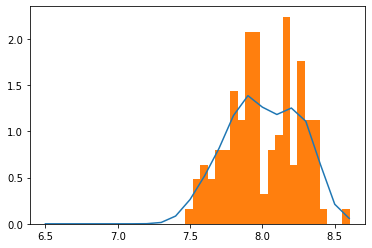

In [181]:
g_ventas = np.arange(6.5,max(v_gasolina),.1)
plt.figure()
plt.plot(g_ventas,Vehiculo_g(g_ventas));
plt.hist(v_gasolina,bins = 22, density = True);
plt.show()

### Probrando ajuste de distribuciones hipotéticas

Probaremos diferentes distribuciones de probabilidad para encontrar si hay alguna que se ajuste mejor que el KDE

C:\Users\tonat\anaconda2020\lib\site-packages\scipy\stats\_continuous_distns.py:8434: RuntimeWarning: divide by zero encountered in double_scalars
  A = chi**3 / (_norm_pdf_C * _argus_phi(chi))
C:\Users\tonat\anaconda2020\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


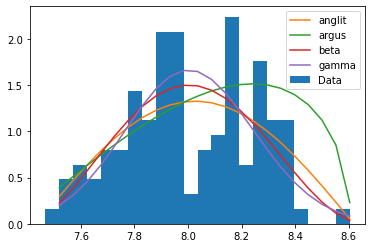

In [182]:
y, x ,_ = plt.hist(v_gasolina, bins=22, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[1:2] + dist[3:5] + ['gamma']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(v_gasolina)
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show()

In [48]:
##ERROR DEL KERNEL

In [183]:
error_k=((y-Vehiculo_g(g_ventas))**2).mean()
nodo1_error = error.T
nodo1_error['kernel'] = error_k
nodo1_error

,anglit,argus,beta,gamma,kernel
error,0.243004,0.373505,0.249915,0.278915,0.781458


La distribución que mejor se ajusta a la distribución real es la de anglit.


decidimos hacer la prueba de chi cuadrada y cuantil cuantil para corroborar si en efecto la distribución anglit se ajustaba mejor que la de kernel.

$H_o =$ Los datos distribuyen como una función de distribución anglit

$H_a =$ Los datos NO distribuyen como una función de distribución anglit

### Pruebas de chi cuadrada

In [184]:
#Cambiar dependiendo se sale menos error en beta que en gamma

params = st.anglit.fit(x)

pi = st.anglit.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)


Valor de chi cuadrado teorico  =  115.68187419538668
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=115.68187419538668, pvalue=4.3968133413884385e-15)
Estadístico de chi_cuadrado =  27.58711163827534


Se rechaza la Hipotesis Nula

### Prueba de cuantil-cuantil

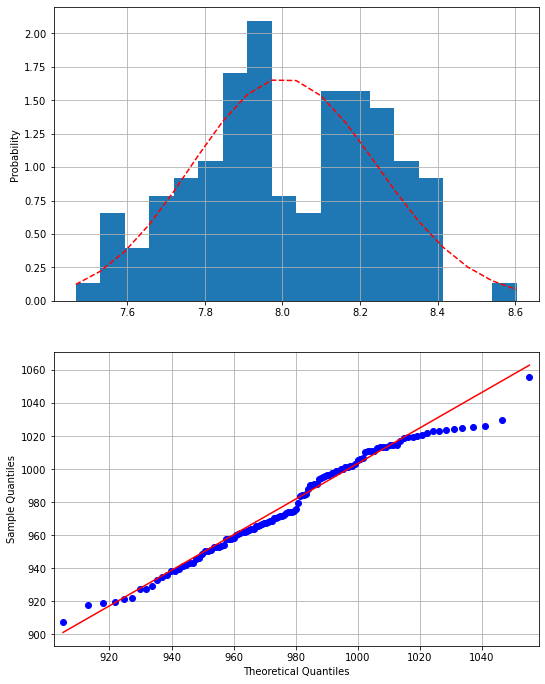

In [185]:
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(v_gasolina, bins=18, density=True, label='Histograma mediciones')
dist = 'gamma'
params = getattr(st, dist).fit(v_gasolina)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()

grap1 = sm.qqplot(v_gasolina, dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
ax[1].grid()

### Distribución por Kernel

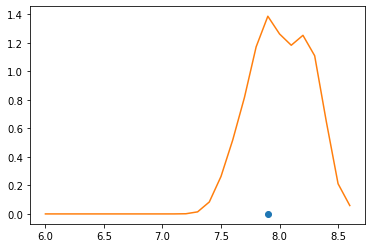

In [226]:
f = Vehiculo_g  #Definimos Kernel como f
x = np.arange(6,max(v_gasolina),.1) #Definimos el vector en el rango de las ventas

max_g = f(optimize.fmin(lambda x:-f(x),1.2,disp=False)) #Calculamos el valor máximo de la función

#Graficamos el punto máximo con el kernel
plt.plot(7.9,max_g,'o',lw = 50)

plt.plot(x,f(x))

### Simulación Montecarlo CRUDO -  Aceptación y Rechazo

In [240]:
## np.random.seed(123)
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
aleatorias_monte_gvehi = acep_rechazo(f,max_g,N,9,1)

In [241]:
#Calculo de medias para montecarlo en escala logarítmica y escala real
mediamon_log_vg = aleatorias_monte_gvehi.mean()
mediamon_re_vg = np.exp(mediamon_log_vg)

#Calculo de medias reales en escala logarítmica y escala real
media_log_vg= v_gasolina.mean()
media_re_vg= np.exp(v_gasolina.mean())

In [242]:
nodo1_medias= pd.DataFrame(index=['Medias'] , columns=['Montecarlo logarítmico', 'Real logarítmico',
                                                     'Montecarlo', 'Real'])
nodo1_medias['Montecarlo logarítmico'] = mediamon_log_vg
nodo1_medias['Real logarítmico'] = mediamon_re_vg
nodo1_medias['Montecarlo'] = media_log_vg
nodo1_medias['Real'] = media_re_vg

nodo1_medias

,Montecarlo logarítmico,Real logarítmico,Montecarlo,Real
Medias,6.376711,587.990513,8.010284,3011.772434


### Histograma de los datos

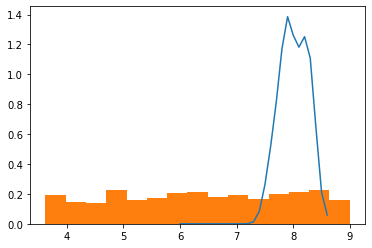

In [243]:
plt.figure()
plt.plot(x,f(x))
plt.hist(aleatorias_monte_gvehi, bins = 15, density = True)
plt.show()

### NODO 2

In [244]:
v_diesel = np.log((data['Quantity_Diesel']))
Vehiculo_d = kde_scipy_1(v_gasolina) #Función


from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(np.array(v_diesel)[:, None])
print(grid.best_params_)

{'bandwidth': 0.1}


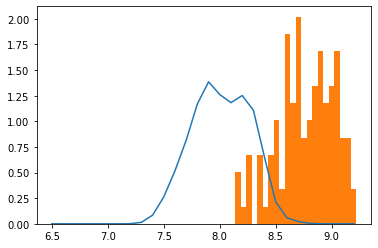

In [245]:
d_ventas = np.arange(6.5,max(v_diesel),.1)
plt.figure()
plt.plot(d_ventas,Vehiculo_d(d_ventas));
plt.hist(v_diesel,bins = 22, density = True);
plt.show()

C:\Users\tonat\anaconda2020\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


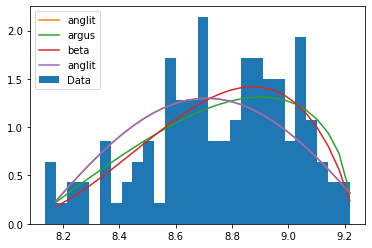

In [246]:
y, x ,_ = plt.hist(v_diesel, bins=28, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[1:2] + dist[3:5] + ['anglit']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(v_diesel)
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show()

In [247]:
error_k=((y-Vehiculo_d(d_ventas))**2).mean()
nodo1_error = error.T
nodo1_error['kernel'] = error_k
nodo1_error

,anglit,argus,beta,anglit,kernel
error,0.240114,0.16531,0.154613,0.240114,0.603967


In [248]:
#Cambiar dependiendo se sale menos error en beta que en gamma

params = st.anglit.fit(x)
pi = st.anglit.pdf(x, params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

ValueError: operands could not be broadcast together with shapes (28,) (2,) 

# NODO 3 - HIBRIDOS

In [120]:
hibrido = (data['Quantity_Hybrid'])
mindatos = np.min(hibrido)
maxdatos = np.max(hibrido)

hibrido

Year
2007-1        0.0
2007-2        0.0
2007-3        0.0
2007-4        0.0
2007-5        0.0
            ...  
2016-9     3991.0
2016-10    3209.0
2016-11    3181.0
2016-12    2597.0
2017-1     4419.0
Name: Quantity_Hybrid, Length: 121, dtype: float64

#### Vemos el histograma por si solo:

In [246]:
np.random.seed(10)
muestra_n2 = np.random.choice(hibrido, 10000)

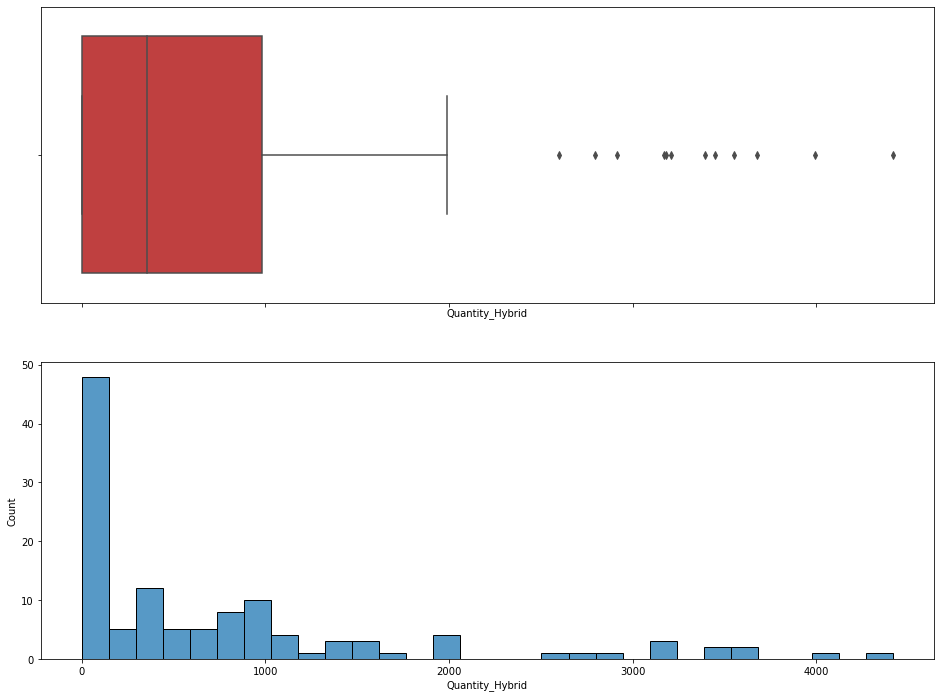

In [247]:
fig,(ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(16, 12))
sns.histplot(hibrido, ax = ax2, bins = 30);
sns.boxplot(hibrido, ax = ax1, saturation =.5, color = 'r');

Por estos dos tipos de graficas podemos observar que la mayoría de nuestros datos se concentra del lado izquierdo y que existen algunos valores atipicos cerca de nuestro valor máximo

#### Visualizamos el histograma vs la función del KDE (sin reducción de varianzas)

In [122]:

def acep_rechazo_simplificada(
    N:'Cantidad de variables a generar',
    Dom_f:'Dominio de la función f como tupla (a,b)',
    f:'función objetivo a generar',
    max_f:'máximo valor de f'):
    
    ''' Esta función aplica el método de aceptación y rechazo a una función de distribución para generar valores'''
    X = np.zeros(N)
    i=0
    while i<N:
        R2=np.random.uniform(0,max_f)
        R1=np.random.uniform(Dom_f[0], Dom_f[1])

        if R2<= f(R1):
            X[i]=R1
            i+=1

    return X

#aplicar método de aceptación y rechazo para generar 10000 valores
generados_ar_columna1=acep_rechazo_simplificada(10000, (min(hibrido), max(hibrido)), pdf_columna1_gene, max(pdf_columna1))

### Las distribuciones que probaremos seran:

In [220]:
[d for d in dir(st) if isinstance(getattr(st, d), getattr(st, 'rv_continuous'))][0:20]

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow']

In [221]:
distr_opt_datosh = best_fit_distribution_1(hibrido, 50)
print('La mejor distribución es:')
distr_opt_datosh[0]

La mejor distribución es:


'chi'

### Probamos más distribuciones

In [267]:
dist_list = [d for d in dir(st) if isinstance(getattr(st, d), getattr(st, 'rv_continuous'))][0:25]
dist_list

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy']

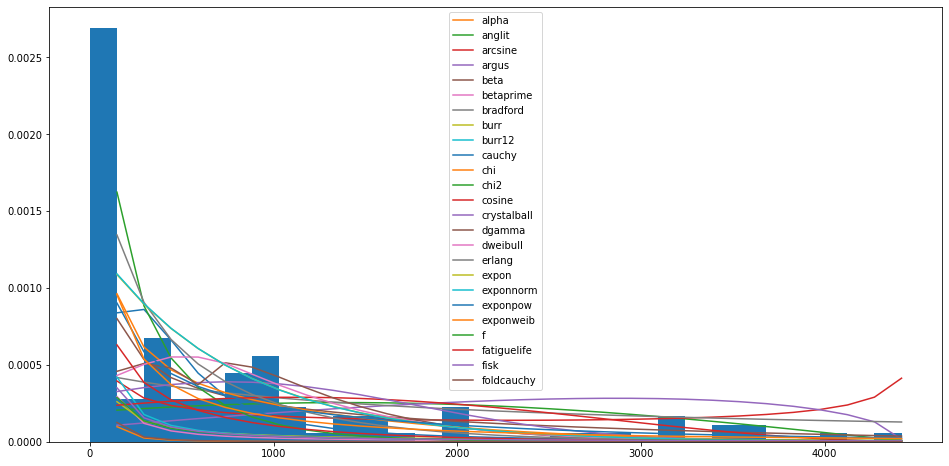

In [268]:
distribuciones(hibrido, dist_list, 30)

In [243]:
err.sort_values(by = 'MSE')

,MSE
chi2,6.63968e-08
erlang,8.35615e-08
exponnorm,1.0948e-07
expon,1.09874e-07
chi,1.13566e-07
exponweib,1.17145e-07
exponpow,1.20477e-07
beta,1.32854e-07
cauchy,1.38767e-07
fatiguelife,1.63961e-07


In [244]:
best = err.sort_values(by = 'MSE').head(3).index.values
best

array(['chi2', 'erlang', 'exponnorm'], dtype=object)

CONCLUIR:

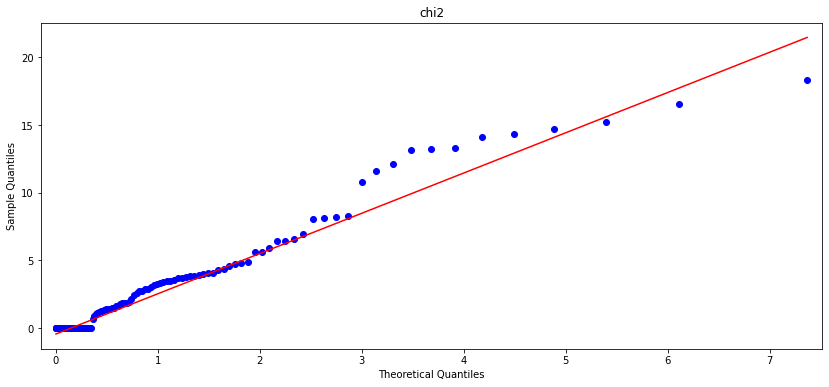

In [245]:
qq(hibrido, best[0]) 
plt.title(best[0]);

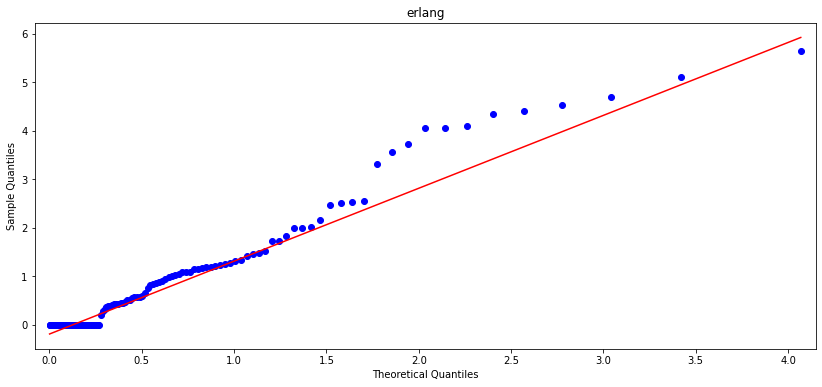

In [227]:
qq(hibrido, best[1]) 
plt.title(best[1]);

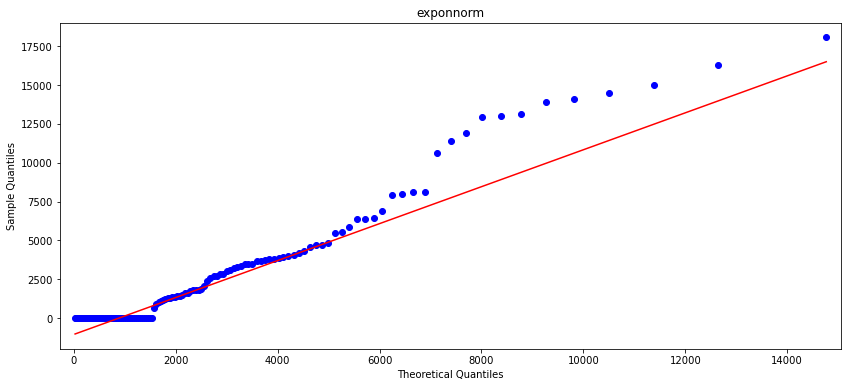

In [228]:
qq(hibrido, best[2]) 
plt.title(best[2]);

In [249]:
mu_r = hibrido.mean()
sigma_r = hibrido.std()
param = getattr(st, 'beta').fit(hibrido)
mu_r, sigma_r

(757.2809917355372, 1026.486127712243)

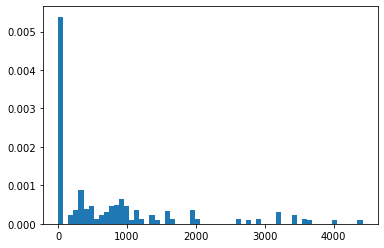

media mu = 2172.675000, desviación estándar muestral = 1275.478233


In [250]:
J = 60
y, x, _ = plt.hist(muestra_n1, J, density=True)
plt.show()

# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media mu = %f, desviación estándar muestral = %f'%(mu, sigma))

In [251]:
pi = st.beta.pdf(x, param[0], param[1], param[2], param[3])

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  inf
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=inf, pvalue=0.0)
Estadístico de chi_cuadrado =  73.31149302908324
Media muestral =  2172.675 
Desviación estándar muestral =  1275.4782331051363


In [252]:
h0 = ['$H_0$ = La PDF es {}'.format(dist) for dist in best]
h0

['$H_0$ = La PDF es chi2',
 '$H_0$ = La PDF es erlang',
 '$H_0$ = La PDF es exponnorm']

In [253]:
ha = ['$H_a$ = La PDF no es {}'.format(dist) for dist in best]
ha

['$H_a$ = La PDF no es chi2',
 '$H_a$ = La PDF no es erlang',
 '$H_a$ = La PDF no es exponnorm']

In [257]:
top_kol_smir = [kol_smir_test(muestra_n1, dist) for dist in best]
top_kol_smir

[KstestResult(statistic=0.3967999999999731, pvalue=0.0),
 KstestResult(statistic=0.46694986876019784, pvalue=0.0),
 KstestResult(statistic=0.3960256471228007, pvalue=0.0)]

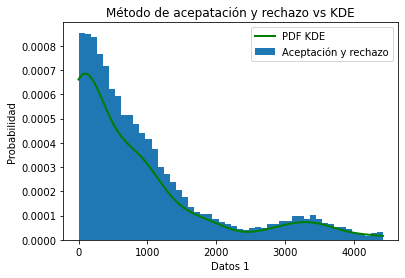

In [275]:
x_grid=np.linspace(min(hibrido), max(hibrido), 1000) #generamos el grid
pdf_columna1=kde_statsmodels_u(hibrido, x_grid, bandwidth=0.2) #calculamos la pdf de los datos 
f = kde_statsmodels_func(hibrido) #obtener la función de distribución generada por el KDE


plot_vs_hist_density(generados_ar_columna1, 50, x_grid, pdf_columna1, 'Aceptación y rechazo', 'PDF KDE',
                    'Datos 1', 'Probabilidad', 'Método de acepatación y rechazo vs KDE')

NameError: name 'MAR' is not defined

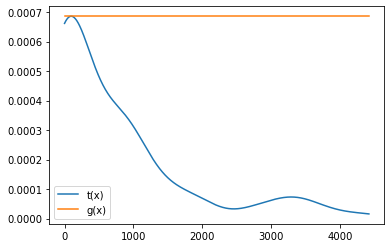

In [276]:
V_A_10000 = R_V_Gen(f, xg, hibrido, 10000, 4, 2000)


### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> https://www.caranddriver.com/es/coches/planeta-motor/a30780438/emisiones-contaminantes-segun-tipo-coche/



<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>